# Problem Set #2-2
- MACS 30150, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: January 15, 2020

## Question 2 Numerical integration

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Problem 1 (Exercise 2.1)

In [2]:
g = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1

In [3]:
def newton_cotes(func, a, b, N, method = {'midpoint', 'trapezoid', 'Simpsons'}):
    
    if method == 'midpoint':
        nodes = np.array([a + ((2 * i + 1) * (b - a)) / (2 * N) for i in range(N)])
        result = (b - a) / N * func(nodes).sum()
        return result
    
    elif method == 'trapezoid':
        nodes = np.array([a + i * (b - a) / N for i in range(N + 1)])
        result = (b - a) / (2 * N) * (func(nodes[0]) + 2 * func(nodes[1:-1]).sum() + func(nodes[-1]))
        return result
    
    elif method == 'Simpsons':
        nodes = [a + i * (b - a) / (2 * N) for i in range(2 * N + 1)]
        odds  = sum([func(xi) for i, xi in enumerate(nodes[1:-1]) if (i + 1) % 2 != 0])
        evens = sum([func(xi) for i, xi in enumerate(nodes[1:-1]) if (i + 1) % 2 == 0])
        result = (b - a) / (6 * N) * (func(nodes[0]) + 4 * odds + 2 * evens + func(nodes[-1]))
        return result


### (a)

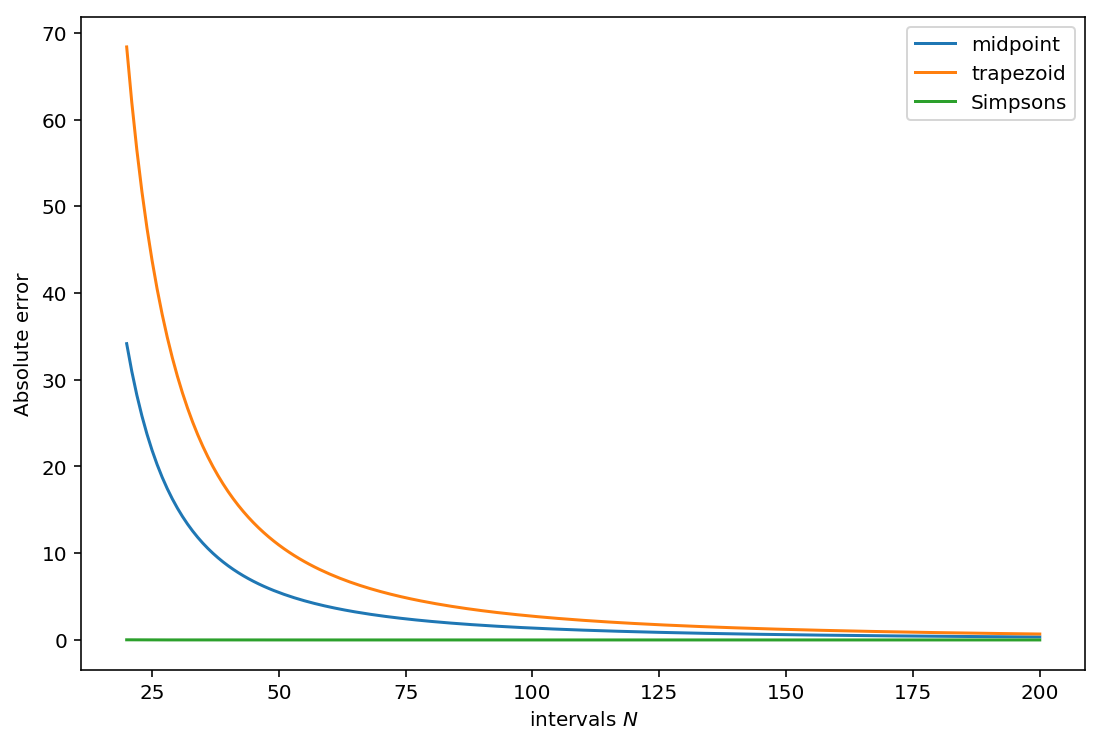

In [4]:
Nvec = np.arange(20, 201, 1)
methods = ['midpoint', 'trapezoid', 'Simpsons']
bench_mark = 4373.3333
fig, ax = plt.subplots(figsize = (9,6))

for m in methods:
    abs_err = [abs(bench_mark - newton_cotes(g, -10, 10, N, method = m)) for N in Nvec]
    ax.plot(Nvec,abs_err, label = m)
plt.xlabel('intervals $N$')
plt.ylabel('Absolute error')
plt.legend()
plt.show();
        

### (b)
In general, as the number of nodes is increasing, the absolute error is decreasing for all methods. However, the convergence speed for each method is different: trapezoid and midpoint are similar but the former is slower and Simpson has already converged at point $N = 20$. Since both the function $g(x)$  and Simpson's rule are quadratic form, the approximation of Simpson's rule can fit very well.

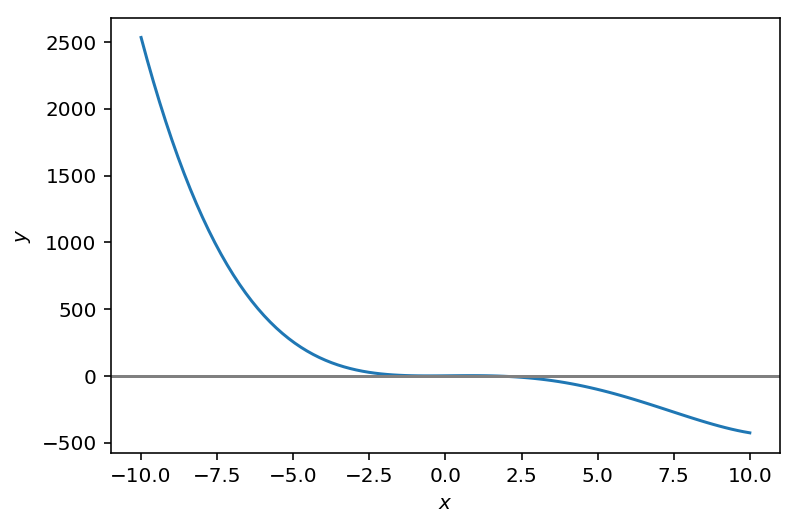

In [5]:
x = np.linspace(-10, 10, 100)
y = [g(xi) for xi in x]
plt.plot(x,y)
plt.axhline(0, color = "grey")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show();

## Problem 2 (Exercise 2.2)

In [6]:
from scipy.stats import norm

def newton_cotes_norm(mu, sigma, N, k):
    a = mu - k * sigma
    b = mu + k * sigma
    Z = np.linspace(a, b, N)
    mid = [(Z[i] + Z[i+1])/2 for i in range(0,N - 1)]
    w = []
    
    w.append(norm.cdf(mid[0], mu, sigma))
    
    for r in range(1, N-1):
        w_ = norm.cdf(mid[r], mu, sigma) - norm.cdf(mid[r - 1], mu, sigma)
        w.append(w_)
    
    w.append(1 - norm.cdf(mid[-1], mu, sigma))
    return Z, np.array(w)

In [7]:
Z, w = newton_cotes_norm(5, 1.5, 11, 3)
print('Weights:\n',np.round(w, 5))
print('Nodes:\n',Z)

Weights:
 [0.00347 0.0144  0.04894 0.11725 0.19803 0.23582 0.19803 0.11725 0.04894
 0.0144  0.00347]
Nodes:
 [0.5 1.4 2.3 3.2 4.1 5.  5.9 6.8 7.7 8.6 9.5]


## Problem 3 (Exercise 2.3)

In [8]:
def newton_cotes_ln_norm(mu, sigma, N, k):
    a = mu - k * sigma
    b = mu + k * sigma
    Z = np.linspace(a, b, N)
    A = np.exp(Z)
    mid = [(Z[i] + Z[i+1])/2 for i in range(0,N - 1)]
    w = []
    
    w.append(norm.cdf(mid[0], mu, sigma))
    
    for r in range(1, N-1):
        w_ = norm.cdf(mid[r], mu, sigma) - norm.cdf(mid[r - 1], mu, sigma)
        w.append(w_)
    
    w.append(1 - norm.cdf(mid[-1], mu, sigma))
    return A, np.array(w)

In [9]:
A, w = newton_cotes_ln_norm(5, 1.5, 11, 3)
print('Weights:\n',np.round(w, 3))
print('Nodes:\n',A)

Weights:
 [0.003 0.014 0.049 0.117 0.198 0.236 0.198 0.117 0.049 0.014 0.003]
Nodes:
 [1.64872127e+00 4.05519997e+00 9.97418245e+00 2.45325302e+01
 6.03402876e+01 1.48413159e+02 3.65037468e+02 8.97847292e+02
 2.20834799e+03 5.43165959e+03 1.33597268e+04]


## Problem 4 (Exercise 2.4)

In [12]:
A, w = newton_cotes_ln_norm(10.5, 0.8, 11, 3)
print('Approximation of the expected income: $%.2f' %(A * w).sum())
print('Exact expected income               : $%.2f' %(np.exp(10.5 + (0.8**2) /2)))

Approximation of the expected income: $48949.76
Exact expected income               : $50011.09


## Problem 5 (Exercise 3.1)

In [13]:
def gen_poly_(params, N = 3, a = -10, b = 10):
    W, X = np.array_split(params, 2)
    result = []
    for i in range(2 * N):
        hx = (1 / (i + 1)) * (b ** (i + 1) - a ** (i + 1)) - np.dot(W, X ** i)
        result.append(hx)
    return result

In [14]:
from scipy import optimize

def gaussian_quad(N, func):
    init = np.ones(2 * N)
    params = optimize.root(gen_poly_, init, tol = 1e-8).x
    weights, nodes = params[:3], params[3:]
    approx_result = np.dot(weights, func(nodes))
    return approx_result

In [15]:
z = sy.symbols('z')
exact = sy.integrate(0.1 * z ** 4 - 1.5 * z ** 3 + 0.53 * z ** 2 + 2 * z + 1, (z, -10, 10))

In [16]:
gq = gaussian_quad(3, g)
nc = [newton_cotes(g, -10, 10, 3, method = m) for m in methods]
print('Approximation from Gaussian quadrature: %.8f' %gq)
print('Approximation from midpoint           : %.8f' %nc[0])
print('Approximation from trapezoid          : %.8f' %nc[1])
print('Approximation from Simpsons           : %.8f' %nc[2])
print('Analytical value                      : %.8f' %exact)
print('\nAbsolute error of Gaussian quadrature: %.8f'%abs(exact-gq))

Approximation from Gaussian quadrature: 4373.33333334
Approximation from midpoint           : 2967.81893004
Approximation from trapezoid          : 7283.12757202
Approximation from Simpsons           : 4406.25514403
Analytical value                      : 4373.33333333

Absolute error of Gaussian quadrature: 0.00000001


Although $N$ is small, Gaussian quadrature approximates much better than Newton-Cotes quadrature.

## Problem 6 (Exercise 3.2)

In [17]:
from scipy.integrate import quad
quad(g, a = -10, b = 10)

(4373.333333333334, 8.109531705284936e-11)

## Problem 7 (Exercise 4.1)

In [18]:
g_circle = lambda x, y: 1 if x**2 + y ** 2 <= 1 else 0

In [19]:
def mc_circle(func, omega ,N):
    np.random.seed(seed=25)
    mc_draw = np.random.uniform(*omega[0], 2 * N).reshape(-1, 2)
    area = (omega[0][1] - omega[0][0])*(omega[1][1] - omega[1][0])
    
    count = 0
    for n in range(N):
        count += func(*mc_draw[n])
    pi = (area / N) * count
    return pi

In [20]:
import time

def pi_converge(func, omega, timeout = 180.0):
    diff = 1e10
    tole = 1e-5
    N = 1
    start = time.perf_counter()
    while diff > tole:
        pi = mc_circle(g_circle, omega, N)
        diff = abs(pi - 3.1415)
        N += 1
        process_time = time.perf_counter() - start
        if process_time > timeout:
            print('Session timeout')
            break
    return N, pi, process_time

In [22]:
omega = np.array([[-1,1],[-1,1]])
N, pi, process_time = pi_converge(g_circle, omega)
print('The smallest number of random draws: %d' %N,
      '\nEstimated pi                       : %.6f' %pi,
      '\nProcessing time                    : %.4f' %process_time,
      '\n')

The smallest number of random draws: 2326 
Estimated pi                       : 3.141505 
Processing time                    : 4.5525 



## Problem 8 (Exercise 4.2)

In [23]:
def isPrime(n):
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

In [24]:
def primes_ascend(N, min_val=2):
    
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [25]:
def seq_generator(n, d, method = {'weyl', 'haber', 'niederreiter','baker'}):
    p = np.array(primes_ascend(d))
    if method == 'weyl':
        x = n * p ** 0.5
        x = x - np.floor(x)
        return x
    
    elif method == 'haber':
        x = (n * (n + 1))/2 * p ** 0.5
        x = x - np.floor(x)
        return x
        
    elif method == 'niederreiter':
        s = np.arange(1, d + 1)
        x = n * (2 ** (s / (d + 1)))
        x = x - np.floor(x)
        return x
    
    elif method == 'baker':
        x = n * np.exp(p)
        x = x - np.floor(x)
        return x

In [26]:
methods = ['weyl', 'haber', 'niederreiter','baker']
seq = [seq_generator(1073, 2, m) for m in methods]
for m, s in zip(methods, seq):
    print('1,073rd element of 2-d ' + m, s)

1,073rd element of 2-d weyl [0.45115243 0.49051652]
1,073rd element of 2-d haber [0.26885294 0.40737199]
1,073rd element of 2-d niederreiter [0.89528654 0.28132876]
1,073rd element of 2-d baker [0.45719415 0.78111858]


## Problem 9 (Exercise 4.3)

In [27]:
def mc_circle2(func, omega, N, method = {'weyl', 'haber', 'niederreiter','baker'}):
    np.random.seed(seed=25)
    mc_1 = np.array([seq_generator(i, 1, method) for i in np.random.randint(0, 1000, N)])
    mc_2 = np.array([-1*seq_generator(i, 1, method) for i in np.random.randint(0, 1000, N)])
    mc_draw = np.append(mc_1,mc_2).reshape(-1,2)
    area = (omega[0][1] - omega[0][0])*(omega[1][1] - omega[1][0])
    
    count = 0
    for n in range(N):
        count += func(*mc_draw[n])
    pi = (area / N) * count
    return pi

In [28]:
def pi_converge2(func, omega, method, timeout = 180):
    diff = 1e10
    tole = 1e-5
    N = 1
    start = time.perf_counter()
    while diff > tole:
        pi = mc_circle2(g_circle, omega, N, method)
        diff = abs(pi - 3.1415)
        N += 1
        process_time = time.perf_counter() - start
        if process_time > timeout:
            print('Session timeout')
            break
    return N, pi, process_time

In [29]:
methods = ['weyl', 'haber', 'niederreiter','baker']
omega = np.array([[-1,1],[-1,1]])

for m in methods:
    N, pi, process_time = pi_converge2(g_circle, omega, m)
    print('Name of Sequence                   : ' + m , 
          '\nThe smallest number of random draws: %d' %N,
          '\nEstimated pi                       : %.6f' %pi,
          '\nProcessing time                    : %.4f' %process_time,
          '\n')

Name of Sequence                   : weyl 
The smallest number of random draws: 1464 
Estimated pi                       : 3.141490 
Processing time                    : 23.5438 

Name of Sequence                   : haber 
The smallest number of random draws: 849 
Estimated pi                       : 3.141509 
Processing time                    : 8.1000 

Name of Sequence                   : niederreiter 
The smallest number of random draws: 1464 
Estimated pi                       : 3.141490 
Processing time                    : 27.0828 

Name of Sequence                   : baker 
The smallest number of random draws: 3584 
Estimated pi                       : 3.141502 
Processing time                    : 121.8570 



**Haber** is the smallest and fastest convergence for the 4th decimal 3.1415